In [2]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_wine

# Load the wine dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Display the shape and first few rows
print("Dataset shape:", X.shape)
print(X.head())


Dataset shape: (178, 13)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  prol

In [3]:
# Standardize the dataset (important for clustering)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


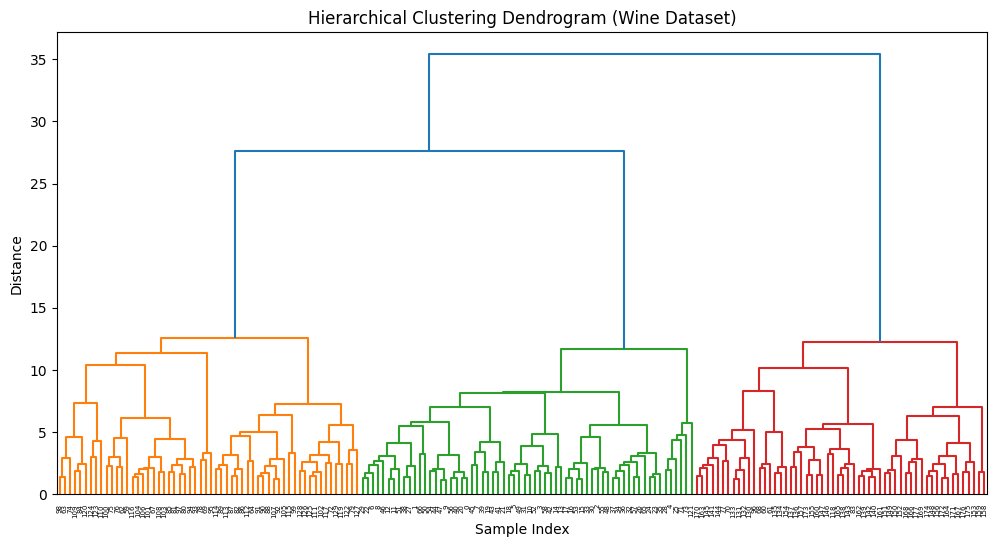

In [4]:
# Create a linkage matrix for the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method='ward')  # 'ward' minimizes variance within clusters

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (Wine Dataset)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [6]:
# Apply Agglomerative Clustering based on dendrogram (assume 3 clusters)
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = cluster.fit_predict(X_scaled)

# Add cluster labels to original DataFrame
X_clustered = X.copy()
X_clustered['cluster'] = labels

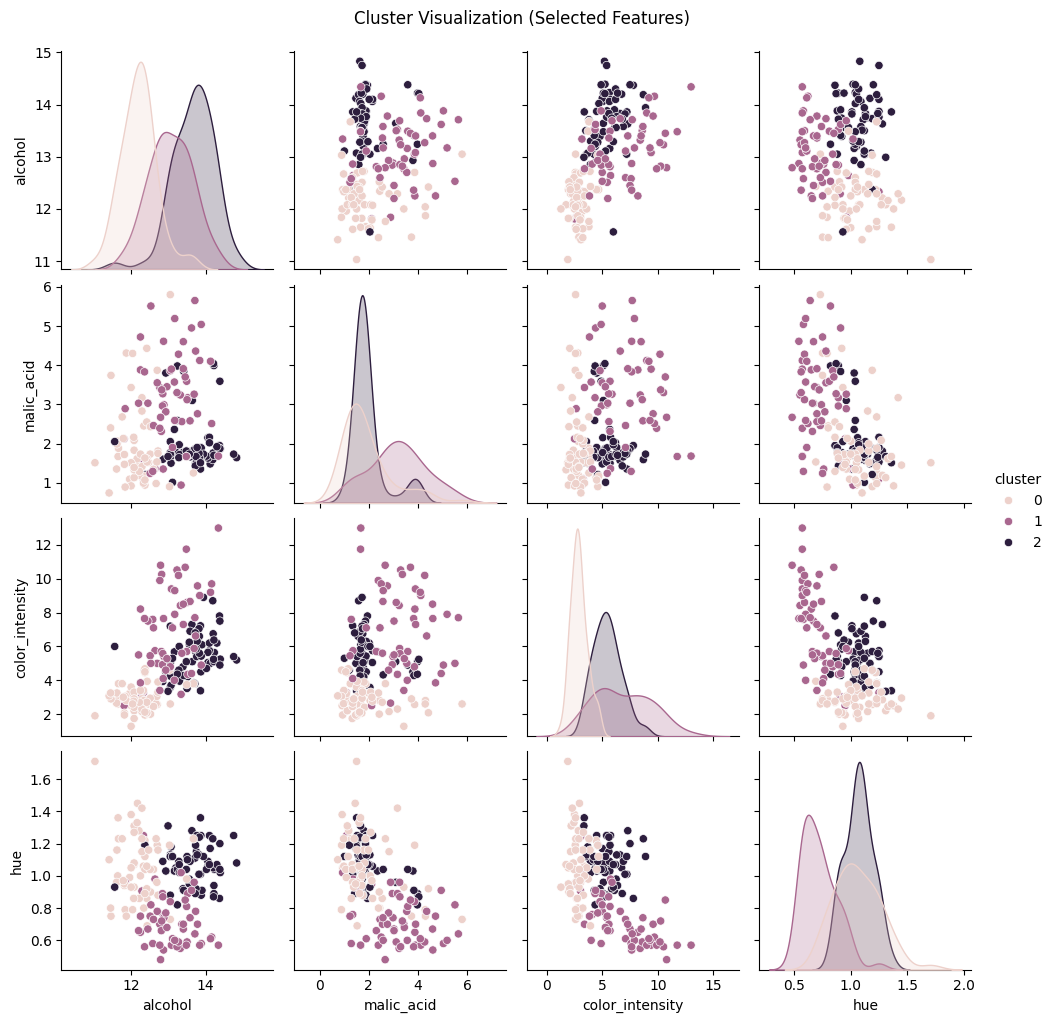

In [7]:
# Visualize using pairplot (select important features)
import seaborn as sns

sns.pairplot(X_clustered,
             hue='cluster',
             vars=['alcohol', 'malic_acid', 'color_intensity', 'hue'],
             diag_kind='kde')
plt.suptitle("Cluster Visualization (Selected Features)", y=1.02)
plt.show()


In [8]:
# Compare predicted clusters with true class labels
true_labels = wine.target

print("Predicted Clusters:", pd.Series(labels).value_counts().sort_index())
print("True Class Distribution:", pd.Series(true_labels).value_counts().sort_index())


Predicted Clusters: 0    58
1    56
2    64
Name: count, dtype: int64
True Class Distribution: 0    59
1    71
2    48
Name: count, dtype: int64
